# Checkpoint 7


## Part A - Explore Data 


In [1]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
#Reading File
data_frame = pd.read_csv(r'Titanic_Survived.csv')

#Display data
data_frame.head()

,Survived,Pclass,SibSp,Parch,Fare,Title,FamilySize,C,Q,S,female,male,Age
0,0,2,0,0,13.0000,0,1,0,0,1,0,1,0.346569
1,0,3,0,0,7.6500,0,1,0,0,1,0,1,0.308872
2,0,3,0,0,7.8542,0,1,0,0,1,0,1,0.246042
3,0,3,0,4,21.0750,0,5,0,0,1,1,0,0.359135
4,0,1,1,0,52.0000,0,2,0,0,1,0,1,0.384267


## Part B - Supervised Machine Learning

### 1 - Decision Tree

#####      A- Splitting dataset into a training set and a testing set

In [3]:
#features extraction

x = data_frame.drop('Survived' , axis=1)
y = data_frame['Survived']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1) 

#####      B- Feature Scalling

In [4]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

#####      C- Build Model

In [5]:
treeClass = tree.DecisionTreeClassifier(max_depth = 7)  
treeClass.fit(x_train, y_train)   #fitting our model
pred=treeClass.predict(x_test)   # evaluating our modelc
print("Accuracy Score: {}".format(accuracy_score(y_test, pred)))
 

Accuracy Score: 0.7802690582959642


#####      D- Plot Model

Install graphviz and pydotplus with Anaconda PowerShell Prompt using this code:
* conda install -c anaconda python-graphviz
* conda install -c conda-forge pydotplus

0 Pclass
1 SibSp
2 Parch
3 Fare
4 Title
5 FamilySize
6 C
7 Q
8 S
9 female
10 male
11 Age


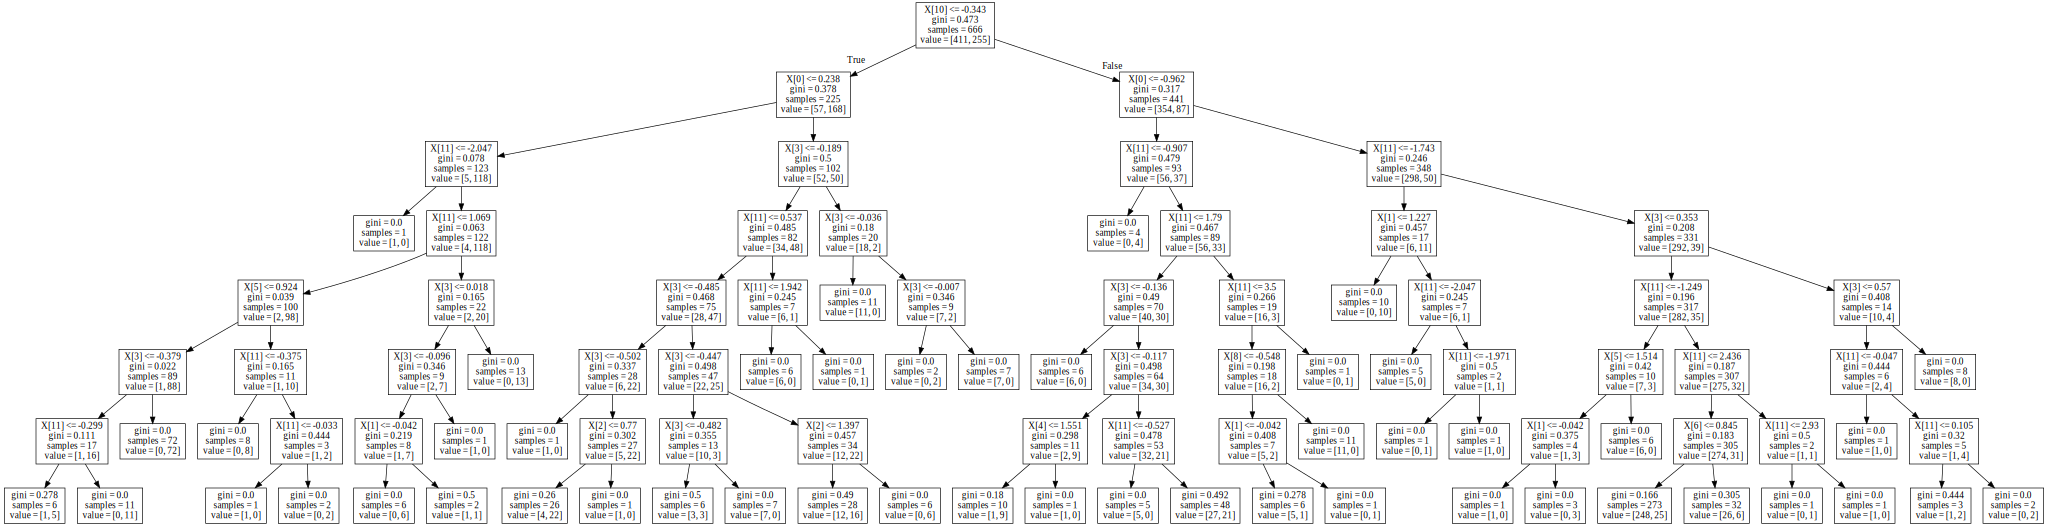

In [6]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(treeClass, out_file=None) 
graph = graphviz.Source(dot_data)
graph.render("data_frame")
for i in range(len(x.columns)):
        print(i, x.columns[i])
        
    
graph


## Decision Tree Parameters

In [7]:
for i in range(1,11):
    treeClass = tree.DecisionTreeClassifier(criterion='entropy',max_depth = i, splitter='random')  
    treeClass.fit(x_train, y_train)   #fitting our model
    pred=treeClass.predict(x_test)   # evaluating our modelc
    print('Max_depth :', i, "--> Accuracy Score: {}".format(accuracy_score(y_test, pred)))

 

Max_depth : 1 --> Accuracy Score: 0.7937219730941704
Max_depth : 2 --> Accuracy Score: 0.7847533632286996
Max_depth : 3 --> Accuracy Score: 0.7982062780269058
Max_depth : 4 --> Accuracy Score: 0.8116591928251121
Max_depth : 5 --> Accuracy Score: 0.8161434977578476
Max_depth : 6 --> Accuracy Score: 0.8116591928251121
Max_depth : 7 --> Accuracy Score: 0.8251121076233184
Max_depth : 8 --> Accuracy Score: 0.8295964125560538
Max_depth : 9 --> Accuracy Score: 0.7085201793721974
Max_depth : 10 --> Accuracy Score: 0.7354260089686099


## Comparison Between Gini and Entropy

Criterion = Gini :
* Max_depth : 1 --> Accuracy Score: 0.7937219730941704
* Max_depth : 2 --> Accuracy Score: 0.7847533632286996
* Max_depth : 3 --> Accuracy Score: 0.8161434977578476
* Max_depth : 4 --> Accuracy Score: 0.8251121076233184
* Max_depth : 5 --> Accuracy Score: 0.8295964125560538
* Max_depth : 6 --> Accuracy Score: 0.8340807174887892 ** The highest Accuracy 
* Max_depth : 7 --> Accuracy Score: 0.820627802690583
* Max_depth : 8 --> Accuracy Score: 0.8251121076233184
* Max_depth : 9 --> Accuracy Score: 0.8116591928251121
* Max_depth : 10 --> Accuracy Score: 0.7982062780269058


Criterion = Entropy
* Max_depth : 1 --> Accuracy Score: 0.7937219730941704
* Max_depth : 2 --> Accuracy Score: 0.7847533632286996
* Max_depth : 3 --> Accuracy Score: 0.8161434977578476
* Max_depth : 4 --> Accuracy Score: 0.8295964125560538
* Max_depth : 5 --> Accuracy Score: 0.8161434977578476
* Max_depth : 6 --> Accuracy Score: 0.8116591928251121
* Max_depth : 7 --> Accuracy Score: 0.8340807174887892 ** The highest Accuracy 
* Max_depth : 8 --> Accuracy Score: 0.8340807174887892 ** The highest Accuracy 
* Max_depth : 9 --> Accuracy Score: 0.8340807174887892 ** The highest Accuracy 
* Max_depth : 10 --> Accuracy Score: 0.8161434977578476

### 2 - Random Forest

#####      A- Build Model

In [8]:
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)   #fitting our model
pred=clf.predict(x_test)   # evaluating our modelc
print("Accuracy Score: {}".format(accuracy_score(y_test, pred)))

Accuracy Score: 0.8026905829596412


## Random Forest Parameters

In [9]:
for i in range(10,101,10):
    clf=RandomForestClassifier(n_estimators=i)  #Creating a random forest with 100 decision trees
    clf.fit(x_train, y_train)   #fitting our model
    pred=clf.predict(x_test)   # evaluating our modelc
    print('N_Estimators :', i, "--> Accuracy Score: {}".format(accuracy_score(y_test, pred)))

N_Estimators : 10 --> Accuracy Score: 0.7847533632286996
N_Estimators : 20 --> Accuracy Score: 0.8026905829596412
N_Estimators : 30 --> Accuracy Score: 0.8116591928251121
N_Estimators : 40 --> Accuracy Score: 0.8161434977578476
N_Estimators : 50 --> Accuracy Score: 0.7892376681614349
N_Estimators : 60 --> Accuracy Score: 0.8071748878923767
N_Estimators : 70 --> Accuracy Score: 0.8161434977578476
N_Estimators : 80 --> Accuracy Score: 0.7982062780269058
N_Estimators : 90 --> Accuracy Score: 0.7982062780269058
N_Estimators : 100 --> Accuracy Score: 0.7982062780269058


## Important Features

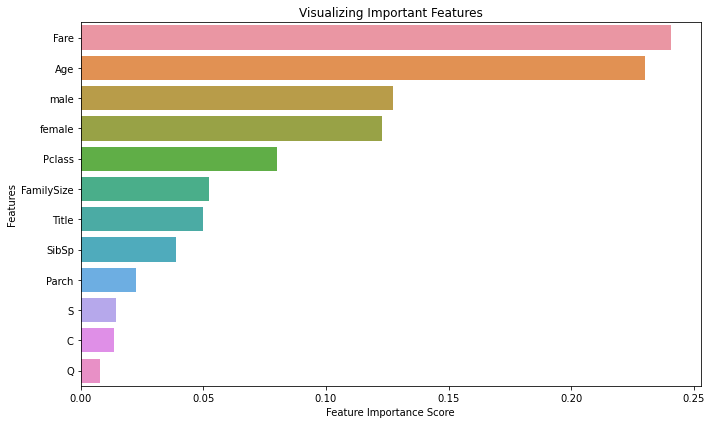

In [10]:

feature_imp = pd.Series(clf.feature_importances_, index=x.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()


## Remove Less important features 

In [11]:
#Drop Features
new_x = x.drop(['Q','S','C','Parch'], axis=1)
new_x.head() 

,Pclass,SibSp,Fare,Title,FamilySize,female,male,Age
0,2,0,13.0000,0,1,0,1,0.346569
1,3,0,7.6500,0,1,0,1,0.308872
2,3,0,7.8542,0,1,0,1,0.246042
3,3,0,21.0750,0,5,1,0,0.359135
4,1,1,52.0000,0,2,0,1,0.384267


In [12]:
#Splitting Training / Testing
x_train,x_test,y_train,y_test=train_test_split(new_x,y,test_size=0.25,random_state=1)

In [13]:
#Build Model
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)   #fitting our model
pred=clf.predict(x_test)   # evaluating our modelc
print("Accuracy Score: {}".format(accuracy_score(y_test, pred)))

Accuracy Score: 0.7982062780269058


In [14]:
for i in range(10,101,10):
    clf=RandomForestClassifier(n_estimators=i)  #Creating a random forest with 100 decision trees
    clf.fit(x_train, y_train)   #fitting our model
    pred=clf.predict(x_test)   # evaluating our modelc
    print('N_Estimators :', i, "--> Accuracy Score: {}".format(accuracy_score(y_test, pred)))

N_Estimators : 10 --> Accuracy Score: 0.8026905829596412
N_Estimators : 20 --> Accuracy Score: 0.8026905829596412
N_Estimators : 30 --> Accuracy Score: 0.7847533632286996
N_Estimators : 40 --> Accuracy Score: 0.7982062780269058
N_Estimators : 50 --> Accuracy Score: 0.8071748878923767
N_Estimators : 60 --> Accuracy Score: 0.8026905829596412
N_Estimators : 70 --> Accuracy Score: 0.8071748878923767
N_Estimators : 80 --> Accuracy Score: 0.7982062780269058
N_Estimators : 90 --> Accuracy Score: 0.8071748878923767
N_Estimators : 100 --> Accuracy Score: 0.7982062780269058
